- 데이터셋
- 데이터 로더
- 클래스 모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# 6\. 데이터셋Dataset

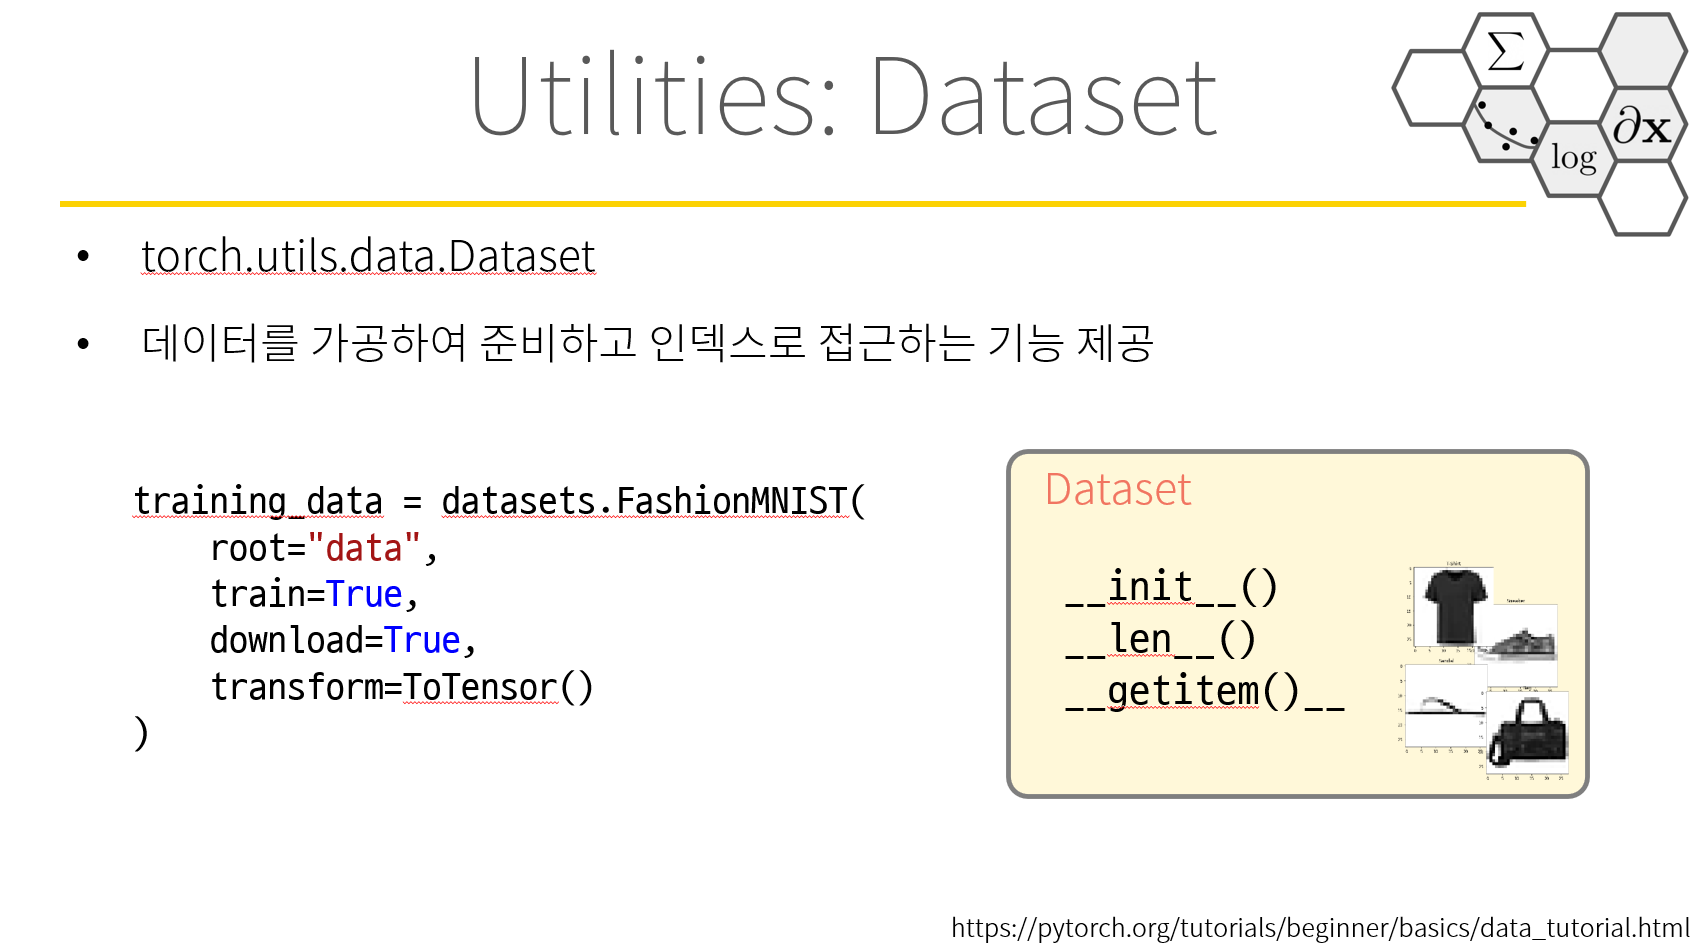

## pytorch에 미리 정의된 데이터셋 불러 오기

- FashionMNIST

In [2]:
# pytorch에서 미리 정의된 Dataset 로드, FashionMNIST
training_data = datasets.FashionMNIST(
    root="data", #데이터라는 폴더를 만든다
    train=True, # train 다운
    download=True, # 실제 다운받아라
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15116818.57it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274529.94it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5041734.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16444993.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# label 정의

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# of Train samples: 60000
# of Test samples: 10000
Sample shape: torch.Size([1, 28, 28]) label: 5


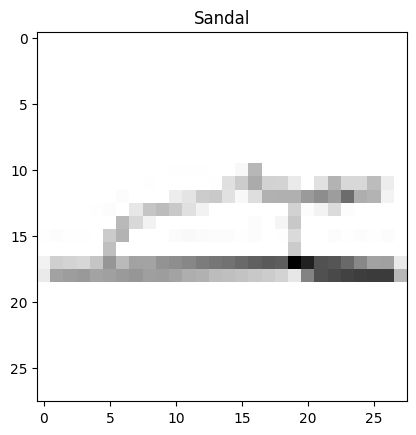

In [4]:
# data개수 확인
print("# of Train samples:", len(training_data))
print("# of Test samples:", len(test_data))

# data 확인
idx = np.random.choice(len(training_data), 1)
X, y = training_data[idx[0]]
print("Sample shape:", X.shape, "label:", y)

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X.squeeze(), cmap='binary')
ax.set_title(labels_map[y])
plt.show()

## 사용자 정의 데이터셋 만들기

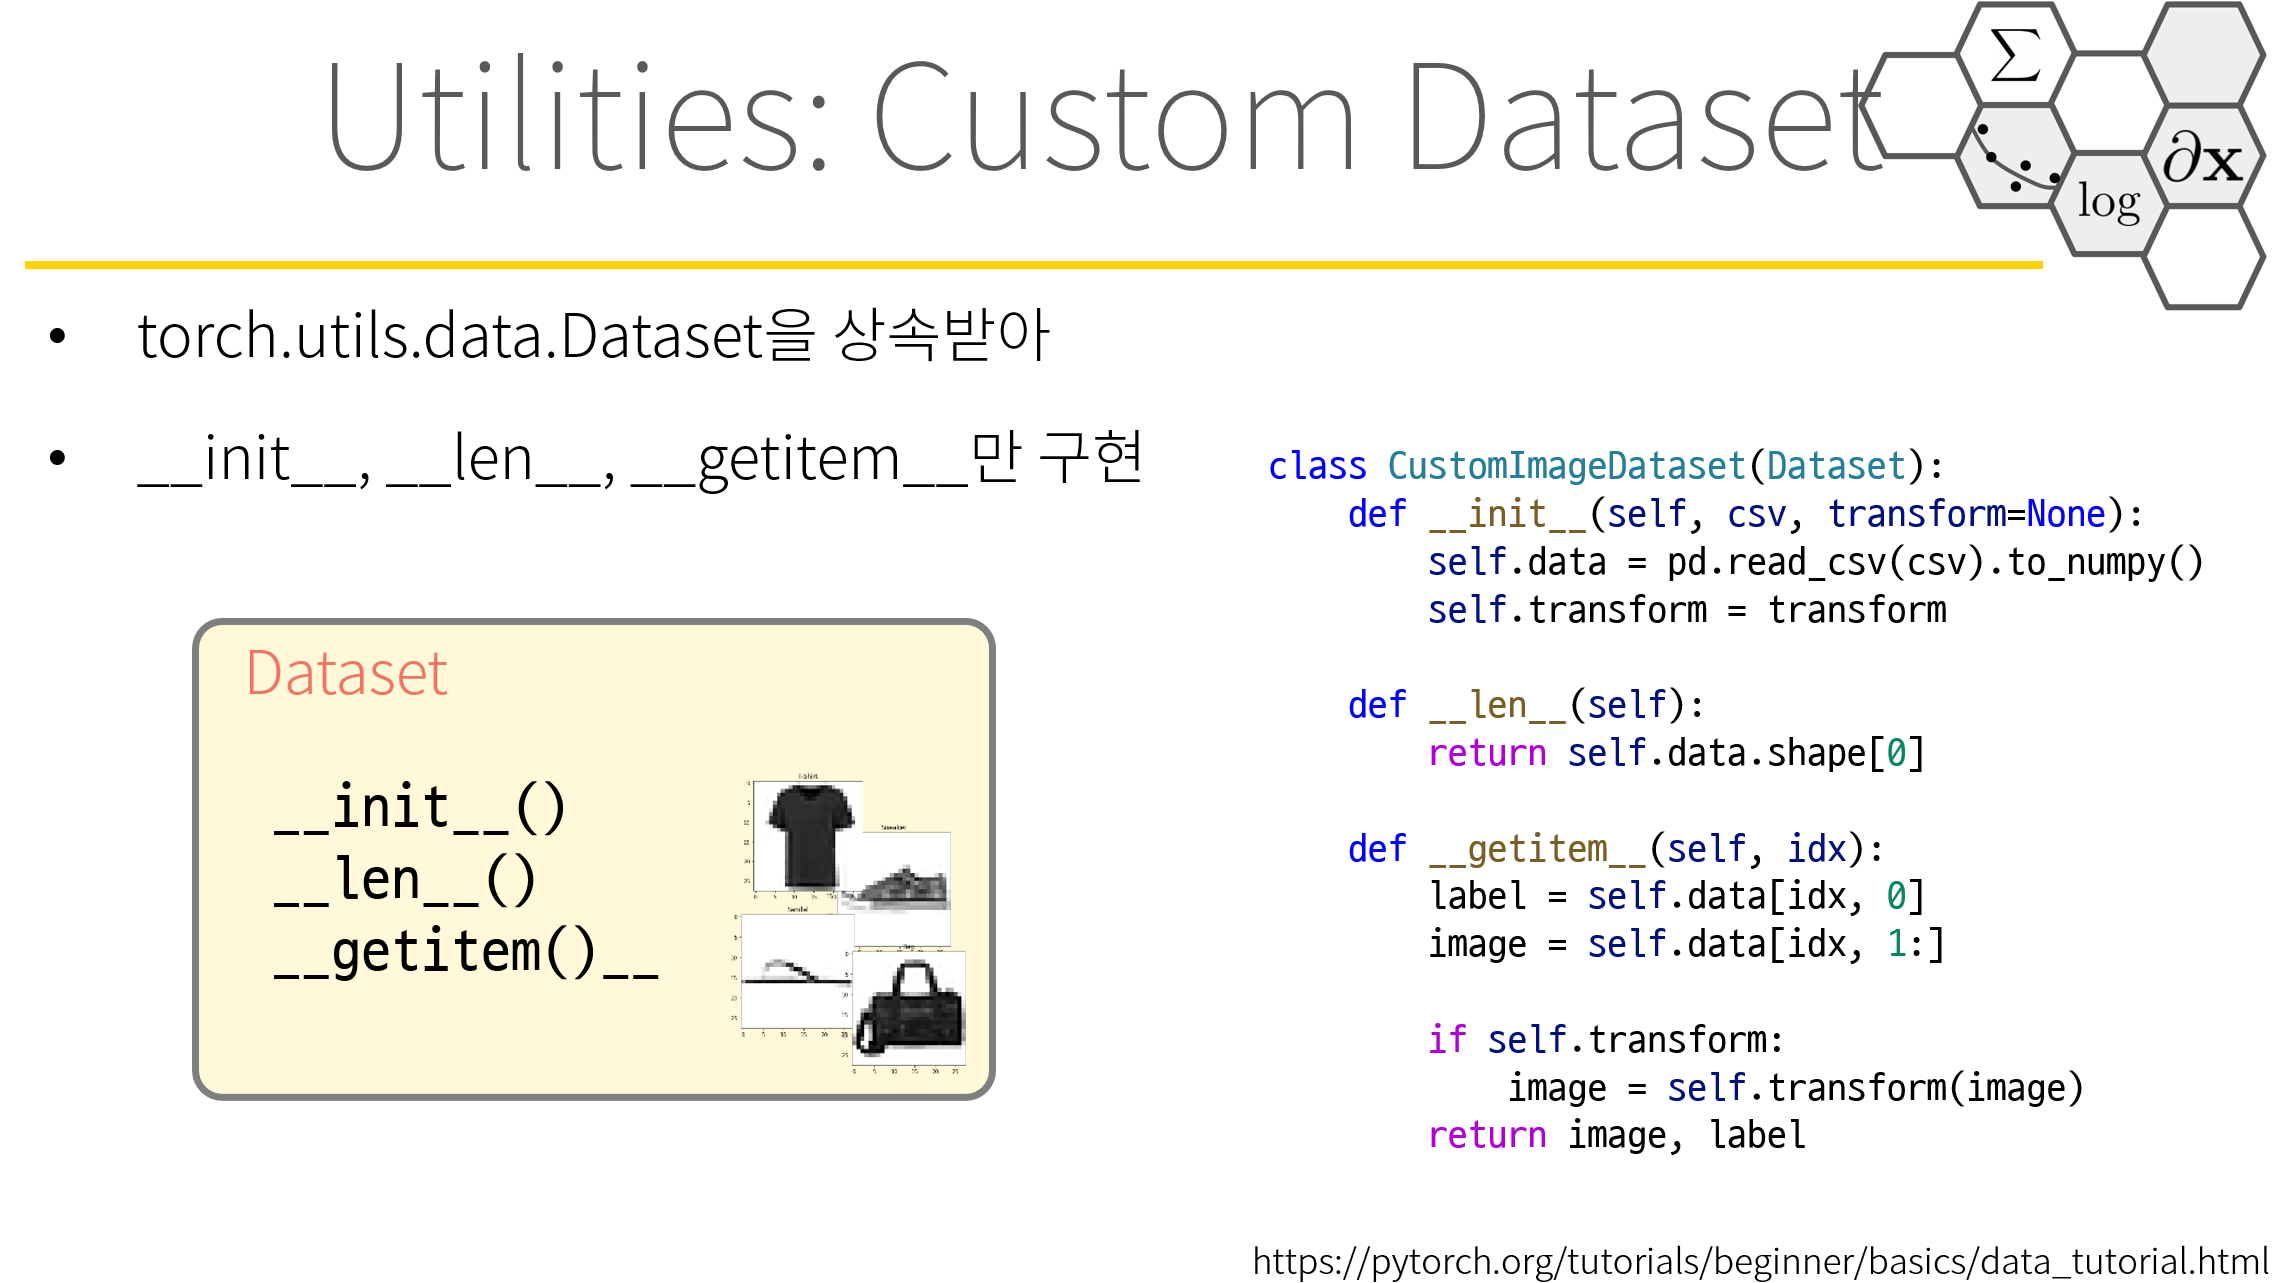

In [5]:
# 구글 드라이브에 저장된 fashion-mnist csv 파일 불러오기
!gdown  1lo-tPwidDyA9uAOUbCkpHetwEuiBxcyp
!unzip fashion-mnist-csv.zip

Downloading...
From (original): https://drive.google.com/uc?id=1lo-tPwidDyA9uAOUbCkpHetwEuiBxcyp
From (redirected): https://drive.google.com/uc?id=1lo-tPwidDyA9uAOUbCkpHetwEuiBxcyp&confirm=t&uuid=140fdff1-ced0-4657-b114-5f2bba8ef402
To: /content/fashion-mnist-csv.zip
100% 36.3M/36.3M [00:00<00:00, 119MB/s]
Archive:  fashion-mnist-csv.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  


In [6]:
!ls -la

total 187080
drwxr-xr-x 1 root root      4096 Feb  7 05:13 .
drwxr-xr-x 1 root root      4096 Feb  7 05:12 ..
drwxr-xr-x 4 root root      4096 Feb  5 20:33 .config
drwxr-xr-x 3 root root      4096 Feb  7 05:13 data
-rw-r--r-- 1 root root  36315660 Feb  7 05:13 fashion-mnist-csv.zip
-rw-r--r-- 1 root root  22176691 Sep 21  2019 fashion-mnist_test.csv
-rw-r--r-- 1 root root 133047193 Sep 21  2019 fashion-mnist_train.csv
drwxr-xr-x 1 root root      4096 Feb  5 20:33 sample_data


In [7]:
# 이미지 파일 정보가 숫자로 csv파일에 적혀 있으므로
# 판다스로 일단 한번 읽어오기 위해 판다스 임포트
import pandas as pd

In [8]:
img_labels = pd.read_csv('fashion-mnist_test.csv')

In [23]:
# 커스텀 데이터 셋 만들기[+]

class CustomImageDataset(Dataset):
    def __init__(self, csv, transform=None):
        self.data = pd.read_csv(csv).to_numpy()
        self.transform = transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        label = self.data[idx, 0]
        image = self.data[idx, 1:].reshape(28,28).astype(np.uint8)

        if self.transform:
          image = self.transform(image)

        return image, label



In [24]:
# transform 없는 상태로 데이터셋 만들기
D_train = CustomImageDataset('fashion-mnist_train.csv')

In [25]:
D_train.data

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [26]:
len(D_train)

60000

In [27]:
D_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
          29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
          62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
         108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
           0

<class 'numpy.ndarray'> uint8 (28, 28) 0 [  0   0   0   0   1   0   0   0   0  41 162 167  84  30  38  94 177 176
  26   0   0   0   1   0   0   0   0   0]


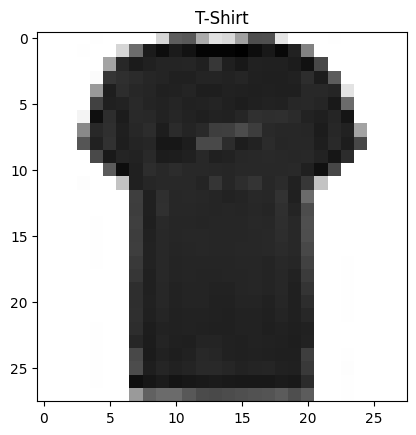

In [28]:
X, y = D_train[10]

# 데이터셋으로 부터 반환되는 데이터 X의 타입과 값 확인
print(type(X), X.dtype, X.shape, y, X[0])

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X, cmap='binary')
ax.set_title(labels_map[y])
plt.show()


In [29]:
# transform이 있는 상태로 데이터셋 만들기[+]
D_train = CustomImageDataset('fashion-mnist_train.csv', transform=ToTensor())
#  def __init__(self, csv, transform=None): transform에 ToTensor..

<class 'torch.Tensor'> torch.float32 torch.Size([1, 28, 28]) 0 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1608, 0.6353, 0.6549, 0.3294, 0.1176, 0.1490, 0.3686, 0.6941, 0.6902,
        0.1020, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])


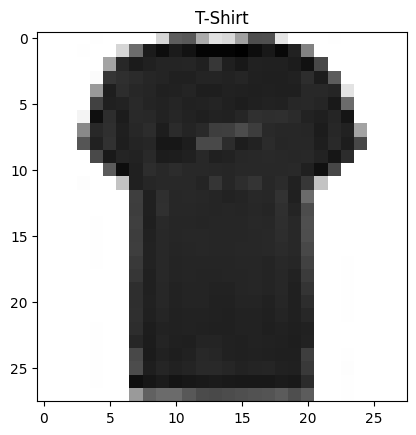

In [30]:
X, y = D_train[10]

# 데이터셋으로 부터 반환되는 데이터 X의 타입과 값 확인
# 이전 transform이 없는 상태로 만들었을 때와 주의깊게 비교
print(type(X), X.dtype, X.shape, y, X[0][0])

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X.squeeze().numpy(), cmap='binary')

ax.set_title(labels_map[y])
plt.show()

# 7\. 이미지 증강Image Augmentation

In [34]:
# 다양한 transform
from torchvision import transforms

In [35]:
T = transforms.Compose([
    # ndarray->pillow image 아래쪽 flip을 수행하기 위해
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=0.5), #이미지를 0.5 확률로 뒤집는다
    # normalize: uint8형이면 ToTensor()에서 0~255->0.~1.
    transforms.ToTensor(),
])

In [36]:
D_train = CustomImageDataset('fashion-mnist_train.csv', transform=T)

<class 'torch.Tensor'> torch.float32 torch.Size([1, 28, 28]) 0 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3961, 0.6157,
        0.5804, 0.5804, 0.6549, 0.7059, 0.7137, 0.7020, 0.6902, 0.6745, 0.6706,
        0.6431, 0.6941, 0.6392, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000])


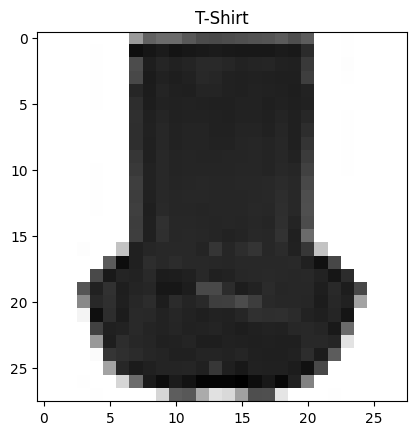

In [37]:
X, y = D_train[10]

print(type(X), X.dtype, X.shape, y, X[0][0])

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X.squeeze().numpy(), cmap='binary')

ax.set_title(labels_map[y])
plt.show()

#8\. 데이터로더DataLoader

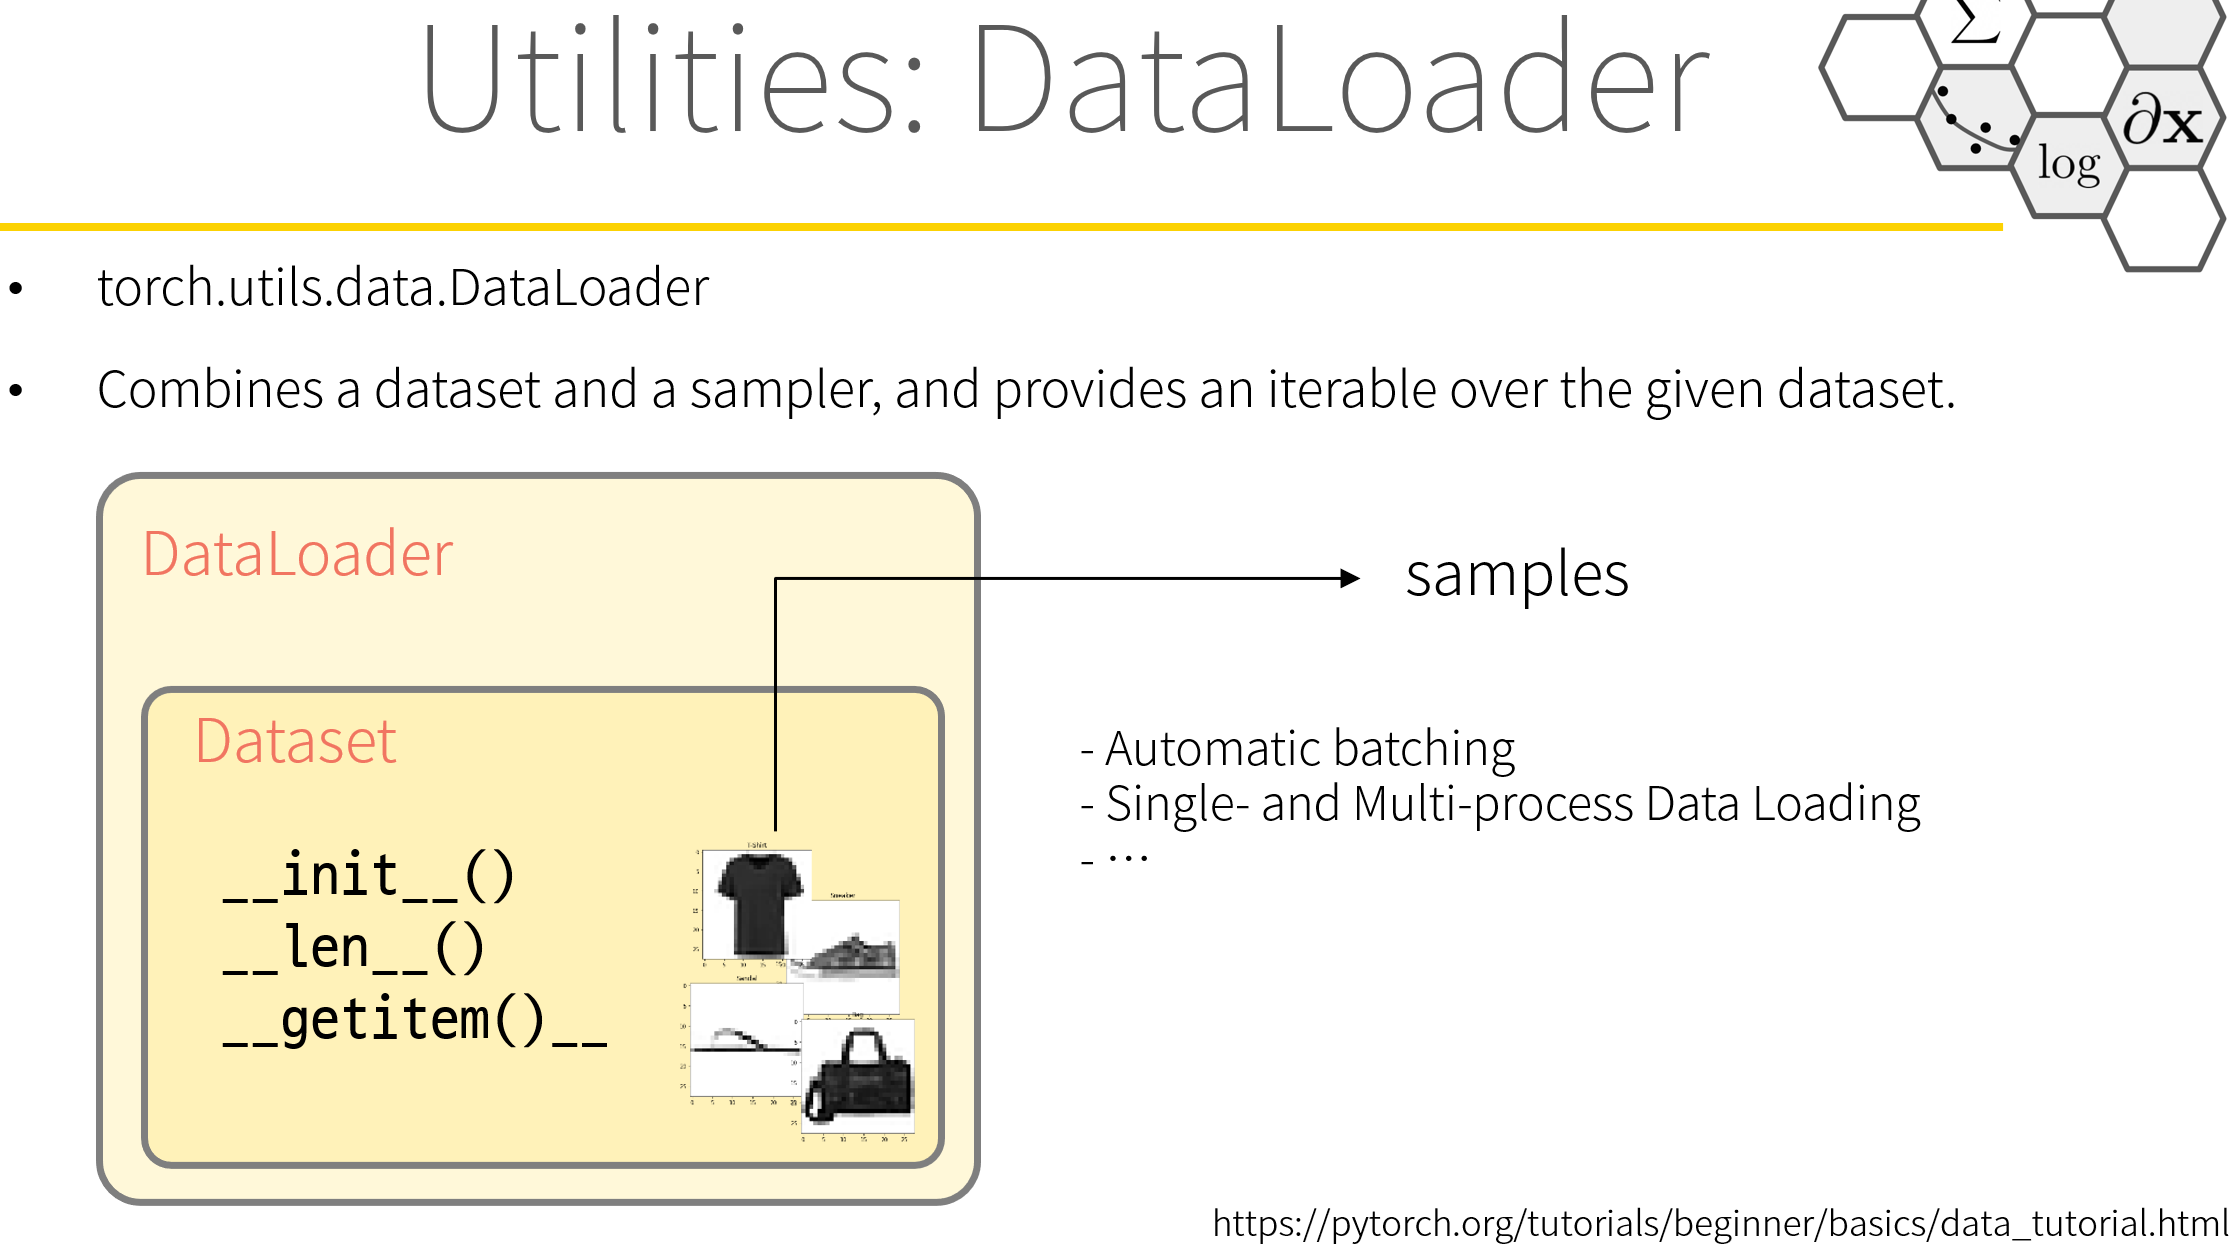

In [38]:
# 데이터 로더 만들기[+]
train_loader = DataLoader(D_train, batch_size=64, shuffle=True)
train_loader_iter = iter(train_loader) # iter(train_loader) for루프에 걸리도록..

sample shape: (5, 1, 28, 28)


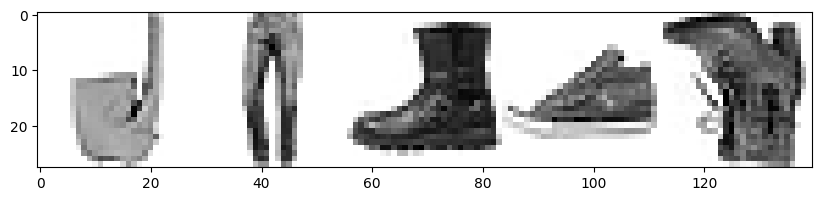

In [43]:
mini_batch = next(train_loader_iter)

# 5장만 그려보기
samples5 = mini_batch[0][:5].numpy()
print("sample shape:", samples5.shape)

images = samples5.squeeze().transpose(1,0,2).reshape(28,-1)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()

ax.imshow(images, cmap='binary')
plt.show()

In [44]:
# 종합하여 test셋에대해서도 데이터 셋과 데이터 로더 만들기
D_test = CustomImageDataset('fashion-mnist_test.csv', transform=ToTensor())
test_loader = DataLoader(D_test, batch_size=100, shuffle=False)
test_loader_iter = iter(test_loader)

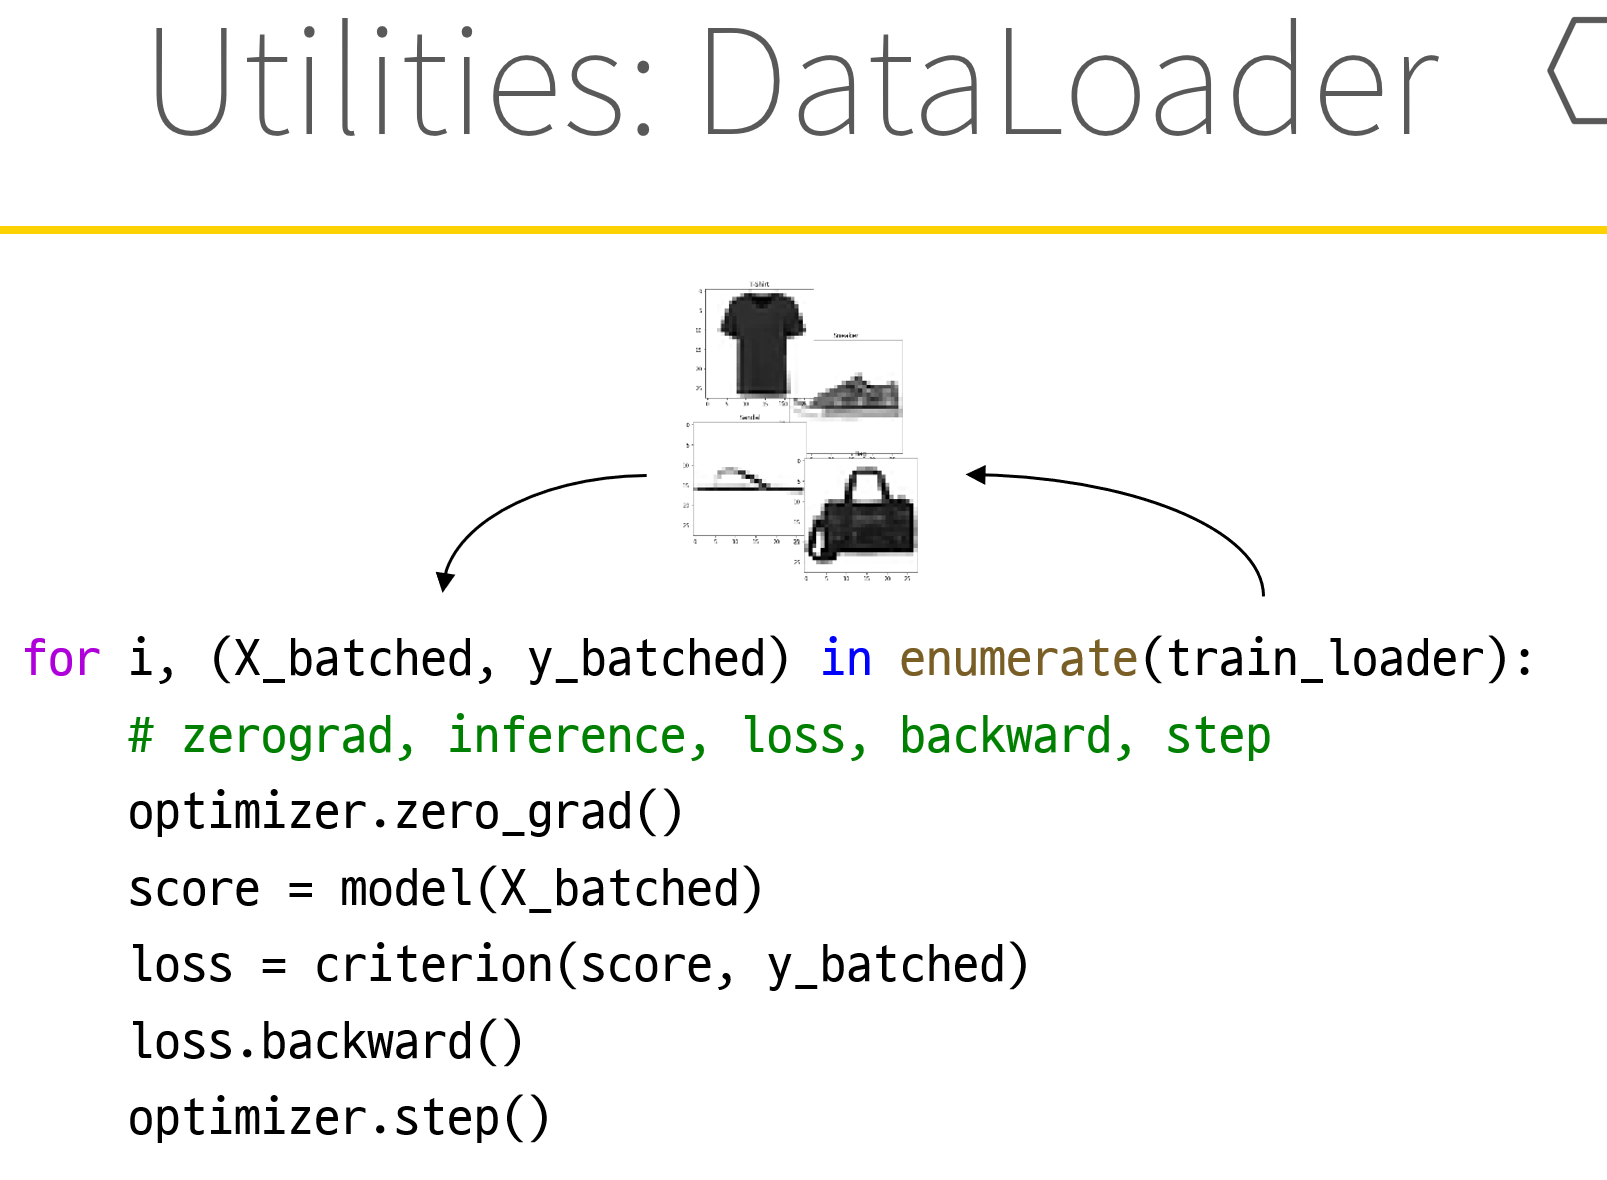

# 9\. 클래스를 활용한 모델 정의

In [51]:
class MyModel(torch.nn.Module): #torch.nn.Module을 상속받아야 하므로..
    def __init__(self):
        super().__init__()

        self.flt = torch.nn.Flatten()
        self.relu = torch.nn.ReLU()
        self.logsoftmax = torch.nn.LogSoftmax(dim=-1)

        self.linear1 = torch.nn.Linear(28*28, 128)
        self.linear2 = torch.nn.Linear(128, 10)


    def forward(self, x):
        x = self.flt(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.logsoftmax(x)

        return x

In [52]:
model = MyModel()

In [53]:
X_batched = next(train_loader_iter)
X_batched[0].shape
# 0번째 : 이미지, 1번째 : 레이블

# torch.Size([64, 1, 28, 28])
# 데이터 64개가 3차원 텐서로 이루어진 4차텐서 -> 이미지 텐서의 경우 복잡함.

torch.Size([64, 1, 28, 28])

In [54]:
output_cpu = model(X_batched[0])

In [55]:
output_cpu.shape

torch.Size([64, 10])

In [56]:
torch.exp(output_cpu).sum(axis=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward1>)

# 10\. GPU 사용

In [57]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [58]:
device

'cuda'

In [59]:
print(f"Model is on: {next(model.parameters()).device}")

Model is on: cpu


In [60]:
model.to(device)

MyModel(
  (flt): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
  (logsoftmax): LogSoftmax(dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

In [61]:
print(f"Model is on: {next(model.parameters()).device}")

Model is on: cuda:0


In [62]:
X_batched[0].device

device(type='cpu')

In [63]:
try:
    # 모델: gpu, input: cpu
    output_gpu = model(X_batched[0])
except Exception as e:
    print(e)
# 모델은 gpu, 입력은 cpu에 있어 오류 발생

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)


In [64]:
output_gpu = model(X_batched[0].to(device))
output_gpu.device

device(type='cuda', index=0)

In [65]:
# 결과를 다시 cpu로 이동하려면 다음과 같이 하면 됨
output_gpu.to('cpu').device

device(type='cpu')

In [66]:
# 모델 학습
epochs = 5

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

history = {
    'loss':[], 'val_loss':[],
    'accuracy':[], 'val_accuracy':[]
}

for e in range(epochs):
    # 데이터 셋 전체를 반복하면서(내부루프)
    # 학습 5단계를 수행한다.
    # 데이터 로더를 for문에 바로 적용하면 한번 반복에 지정된 배치 사이즈 만큼
    # 데이터를 반복해서 반환
    for i, (X_batched, y_batched) in enumerate(train_loader):
        # X_batched:(N,D), y_batched:(N,)
        # 데이터를 device에 올리고 학습 루프 진행
        X_batched = X_batched.to(device)
        y_batched = y_batched.to(device)

        # zerograd, inference, loss, backward, step
        optimizer.zero_grad()
        score = model(X_batched)
        loss = criterion(score, y_batched)
        loss.backward()
        optimizer.step()

    # 한 에폭이 끝난 후 여기서 모델을 평가
    with torch.no_grad():
        output = ""
        # train
        # train loss
        # [주의] 모델의 출력은 (N,C), y는 (N,)
        # 여기서는 그대로 입력
        correct = 0
        loss = 0
        for j, (X_batched, y_batched) in enumerate(train_loader):
            # X_batched:(N,D), y_batched:(N,)
            X_batched = X_batched.to(device)
            y_batched = y_batched.to(device)
            y_pred = model(X_batched)
            predicted = torch.argmax(y_pred, axis=1)
            loss += criterion(y_pred, y_batched).item()
            correct += (predicted == y_batched).sum().item()
        history['accuracy'].append(correct / len(D_train))
        history['loss'].append(loss / len(train_loader))

        # train 데이터에 대한 보고 문장
        output += f"Epoch {e+1} - loss: {history['loss'][-1]:.4f} - accuracy: {history['accuracy'][-1]:.4f}"

        # valid
        correct = 0
        loss = 0
        for j, (X_batched, y_batched) in enumerate(test_loader):
            # X_batched:(N,D), y_batched:(N,)
            X_batched = X_batched.to(device)
            y_batched = y_batched.to(device)
            y_pred = model(X_batched)
            predicted = torch.argmax(y_pred, axis=1)
            loss += criterion(y_pred, y_batched).item()
            correct += (predicted == y_batched).sum().item()
        history['val_accuracy'].append(correct / len(D_test))
        history['val_loss'].append(loss / len(test_loader))

        # valid 데이터에 대한 보고 문장
        output += f" - val_loss: {history['val_loss'][-1]:.4f} - val_accuracy: {history['val_accuracy'][-1]:.4f}"

        print(output)

Epoch 1 - loss: 0.5267 - accuracy: 0.8029 - val_loss: 0.5415 - val_accuracy: 0.7941
Epoch 2 - loss: 0.4539 - accuracy: 0.8321 - val_loss: 0.4622 - val_accuracy: 0.8317
Epoch 3 - loss: 0.4939 - accuracy: 0.8181 - val_loss: 0.5119 - val_accuracy: 0.8111
Epoch 4 - loss: 0.4807 - accuracy: 0.8202 - val_loss: 0.4999 - val_accuracy: 0.8127
Epoch 5 - loss: 0.4562 - accuracy: 0.8316 - val_loss: 0.4628 - val_accuracy: 0.8327
